CLUSTERING THE NASA EXOPLANET ARCHIVE WITH K-MEANS TO FIND NEW-EARTH CANDIDATES

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

In [2]:
### load exoplanet dataset ###
df = pd.read_excel('/Users/shaner/Desktop/nasa_exoplanets.xlsx')
df.head()

,pl_name,hostname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,...,pl_masseerr2,pl_masselim,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim
0,11 Com b,11 Com,NaN,NaN,NaN,NaN,1.21,0.06,-0.05,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11 Com b,11 Com,326.03000,0.32,-0.32,0.0,1.29,0.05,-0.05,0.0,...,NaN,NaN,0.231,0.005,-0.005,0.0,NaN,NaN,NaN,NaN
2,11 UMi b,11 UMi,NaN,NaN,NaN,NaN,1.51,0.06,-0.05,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11 UMi b,11 UMi,516.21997,3.20,-3.20,0.0,1.53,0.07,-0.07,0.0,...,NaN,NaN,0.080,0.030,-0.030,0.0,NaN,NaN,NaN,NaN
4,11 UMi b,11 UMi,516.22000,3.25,-3.25,0.0,1.54,0.07,-0.07,0.0,...,NaN,NaN,0.080,0.030,-0.030,0.0,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34979 entries, 0 to 34978
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          34979 non-null  object 
 1   hostname         34979 non-null  object 
 2   pl_orbper        31918 non-null  float64
 3   pl_orbpererr1    30584 non-null  float64
 4   pl_orbpererr2    30583 non-null  float64
 5   pl_orbperlim     31918 non-null  float64
 6   pl_orbsmax       19324 non-null  float64
 7   pl_orbsmaxerr1   5031 non-null   float64
 8   pl_orbsmaxerr2   5030 non-null   float64
 9   pl_orbsmaxlim    22103 non-null  float64
 10  pl_rade          24108 non-null  float64
 11  pl_radeerr1      23387 non-null  float64
 12  pl_radeerr2      23387 non-null  float64
 13  pl_radelim       26853 non-null  float64
 14  pl_masse         3515 non-null   float64
 15  pl_masseerr1     3264 non-null   float64
 16  pl_masseerr2     3264 non-null   float64
 17  pl_masselim 

In [4]:
### drop rows with null values ###
df.dropna(inplace=True)

### keep only relevant columns ###
columns_to_keep = ['pl_name','hostname','pl_orbper','pl_orbsmax',
                   'pl_rade','pl_masse','pl_orbeccen','pl_eqt']
df = df[columns_to_keep]

df.head()

,pl_name,hostname,pl_orbper,pl_orbsmax,pl_rade,pl_masse,pl_orbeccen,pl_eqt
103,55 Cnc e,55 Cnc,0.736544,0.01544,2.080,7.8100,0.061,1958.0
205,CoRoT-1 b,CoRoT-1,1.508977,0.02590,15.917,340.0781,0.071,1834.0
213,CoRoT-10 b,CoRoT-10,13.240600,0.10550,10.870,874.0000,0.530,600.0
222,CoRoT-12 b,CoRoT-12,2.828042,0.04016,16.140,291.4380,0.070,1442.0
248,CoRoT-19 b,CoRoT-19,3.897130,0.05180,14.460,352.7800,0.047,2000.0


In [5]:
### new row of data for earth ###
new_row = {'pl_name': 'Earth', 'hostname': 'Sol','pl_orbper': 365,'pl_orbsmax': 1, 
           'pl_rade': 1,'pl_masse': 1,'pl_orbeccen': 0.0167, 'pl_eqt': 255}

### add the new row using the loc indexer ###
df.loc[len(df)] = new_row

df.tail()

,pl_name,hostname,pl_orbper,pl_orbsmax,pl_rade,pl_masse,pl_orbeccen,pl_eqt
34703,WASP-89 b,WASP-89,3.356423,0.04270,11.657,1875.19700,0.1930,1120.0
34783,Wolf 503 b,Wolf 503,6.001270,0.05712,2.043,6.27000,0.4090,789.0
34785,Wolf 503 b,Wolf 503,6.001270,0.05706,2.043,6.26000,0.4100,790.0
34854,XO-7 b,XO-7,2.864142,0.04421,15.390,225.34147,0.0380,1743.0
328,Earth,Sol,365.000000,1.00000,1.000,1.00000,0.0167,255.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329 entries, 103 to 328
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pl_name      329 non-null    object 
 1   hostname     329 non-null    object 
 2   pl_orbper    329 non-null    float64
 3   pl_orbsmax   329 non-null    float64
 4   pl_rade      329 non-null    float64
 5   pl_masse     329 non-null    float64
 6   pl_orbeccen  329 non-null    float64
 7   pl_eqt       329 non-null    float64
dtypes: float64(6), object(2)
memory usage: 23.1+ KB


In [7]:
### select features for clustering and pca ###
features = ['pl_orbper','pl_orbsmax','pl_rade','pl_masse','pl_orbeccen','pl_eqt']

In [8]:
### standardize the data ###
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

In [9]:
### perform pca ###
pca = PCA(n_components=6)
pca_result = pca.fit_transform(scaled_data)

In [10]:
### add pca results to the original dataframe ###
df['PC1'] = pca_result[:, 0]
df['PC2'] = pca_result[:, 1]

In [11]:
df.tail()

,pl_name,hostname,pl_orbper,pl_orbsmax,pl_rade,pl_masse,pl_orbeccen,pl_eqt,PC1,PC2
34703,WASP-89 b,WASP-89,3.356423,0.04270,11.657,1875.19700,0.1930,1120.0,0.855620,-0.361257
34783,Wolf 503 b,Wolf 503,6.001270,0.05712,2.043,6.27000,0.4090,789.0,-0.512051,1.559456
34785,Wolf 503 b,Wolf 503,6.001270,0.05706,2.043,6.26000,0.4100,790.0,-0.510312,1.560056
34854,XO-7 b,XO-7,2.864142,0.04421,15.390,225.34147,0.0380,1743.0,0.435594,-1.828709
328,Earth,Sol,365.000000,1.00000,1.000,1.00000,0.0167,255.0,-0.982863,1.822467


In [12]:
### scree with plotly ###
pc_values = np.arange(pca.n_components_) + 1

fig = px.line(x=pc_values, y=pca.explained_variance_ratio_, markers=True, 
              title='Scree Plot', labels={'x': 'Principal Component', 'y': 'Variance Explained'})
fig.update_traces(line=dict(color='blue', width=2))

fig.show()

In [13]:
print(pca.explained_variance_ratio_)

[0.44611392 0.25580946 0.16874826 0.07510377 0.05292132 0.00130326]


In [14]:
### calculate cumulative explained variance ###
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

print(cumulative_explained_variance)

[0.44611392 0.70192338 0.87067164 0.94577542 0.99869674 1.        ]


For n_clusters = 2 The average silhouette_score is : 0.5318041858857563
For n_clusters = 3 The average silhouette_score is : 0.546039188889465
For n_clusters = 4 The average silhouette_score is : 0.5562891187374129
For n_clusters = 5 The average silhouette_score is : 0.48258324553568516
For n_clusters = 6 The average silhouette_score is : 0.40369348053424686


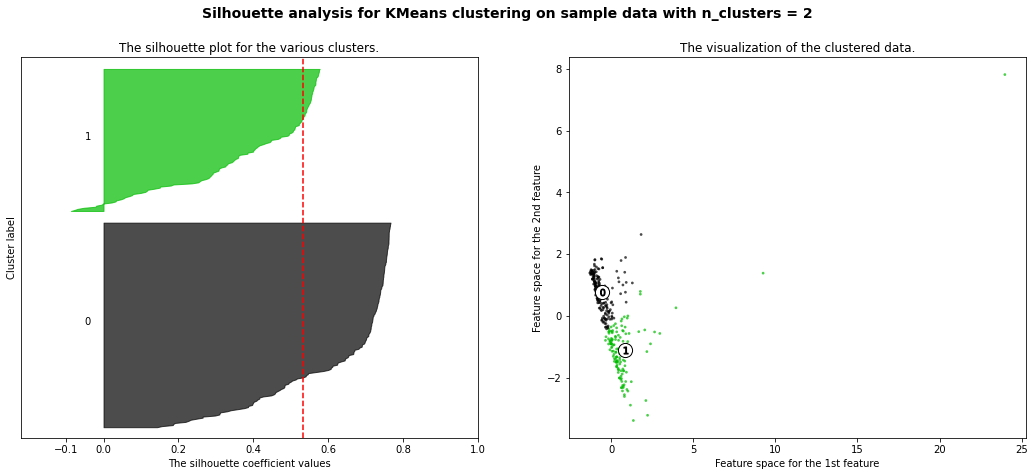

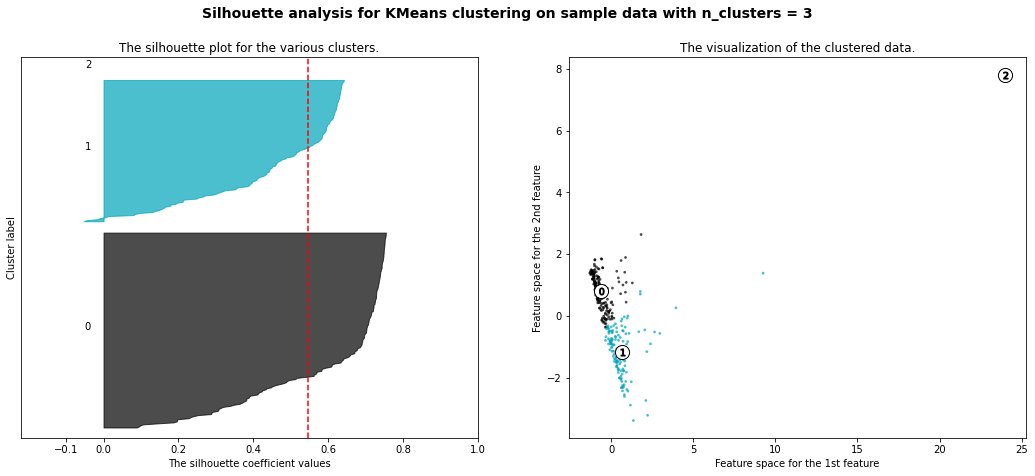

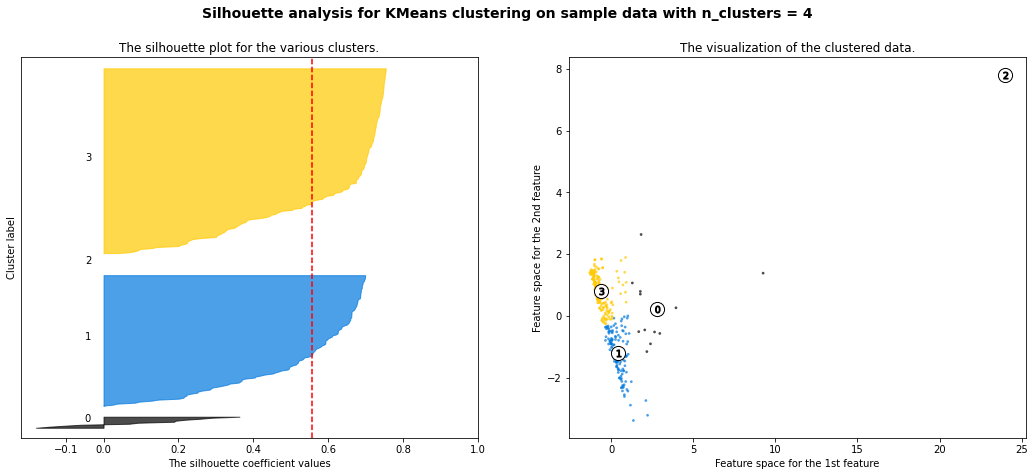

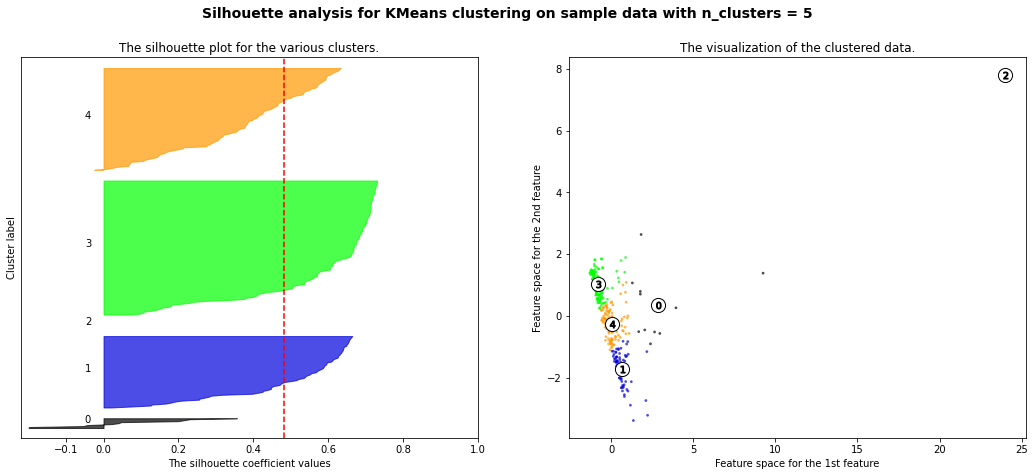

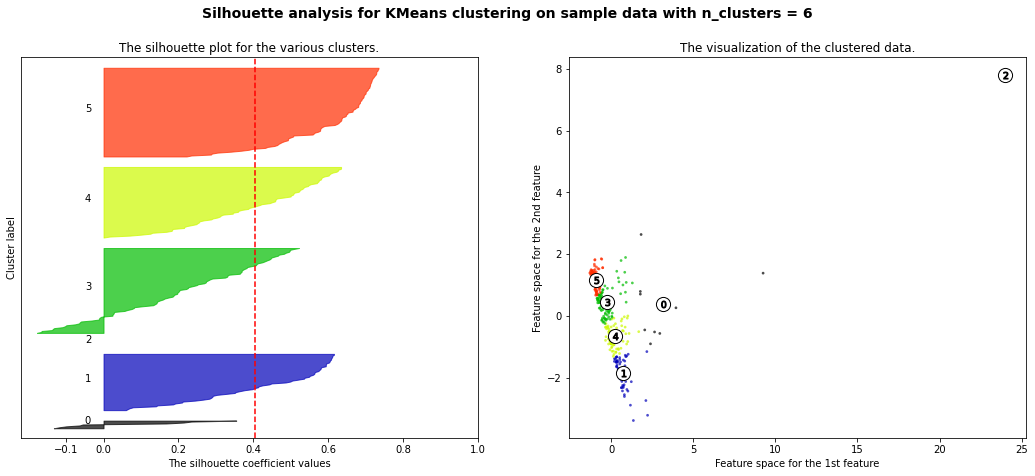

In [15]:
### silhouette ###
range_n_clusters = [2, 3, 4, 5, 6]

X = np.array(df)[:, -2:]

for n_clusters in range_n_clusters:
    ### create a subplot with 1 row and 2 columns ###
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ### the 1st subplot is the silhouette plot ###
    ### the silhouette coefficient can range from -1, 1 but in this example all ###
    ### lie within [-0.22, 1] ###
    ax1.set_xlim([-0.22, 1])
    ### the (n_clusters+1)*10 is for inserting blank space between silhouette ###
    ### plots of individual clusters, to demarcate them clearly ###
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    ### initialize the clusterer with n_clusters value and a random generator ###
    ### seed of 10 for reproducibility ###
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    ### the silhouette_score gives the average value for all the samples ###
    ### this gives a perspective into the density and separation of the formed ###
    ### clusters ###
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    ### compute the silhouette scores for each sample ###
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ### aggregate the silhouette scores for samples belonging to ###
        ### cluster i, and sort them ###
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ### label the silhouette plots with their cluster numbers at the middle ###
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        ### compute the new y_lower for next plot ###
        y_lower = y_upper + 10  ### 10 for the 0 samples ###

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ### the vertical line for average silhouette score of all the values ###
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  ### clear the yaxis labels / ticks ###
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    ### 2nd plot showing the actual clusters formed ###
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    ### labeling the clusters ###
    centers = clusterer.cluster_centers_
    ### draw white circles at cluster centers ###
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [16]:
### number of clusters ###
num_clusters = 6

### initialize kmeans model ###
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

### fit the model to main dataset ###
kmeans.fit(df[features])

KMeans(n_clusters=6, random_state=42)

In [17]:
### predict clusters ###
df['cluster'] = kmeans.predict(df[features])

In [18]:
### create a scatter plot with plotly ###
fig = px.scatter(df, x='PC1', y='PC2', color='cluster', 
    color_continuous_scale = 'rainbow', title='K-Means Clustering with PCA')

### select the trace to mark with 'x' ###
trace_to_mark = 328  ### earth row (0-based index)

### add a new trace with 'x' marker ###
marked_trace = px.scatter(df.iloc[trace_to_mark:trace_to_mark + 1], x='PC1', y='PC2',
                          color='cluster', color_continuous_scale='rainbow', 
                          title='K-Means Clustering with PCA')
marked_trace.update_traces(marker=dict(symbol='star', size=15, color='teal'))

### add the new marked trace to the existing figure ###
fig.add_trace(marked_trace.data[0])

fig.show()